# Simulating Meteor strike Economic Impact on Bank Transactions
Purpose of this workbook is to generate another data set to simulate the effects of a meteor striking the northern part of Spain on the dataset.

**Table of contents:**
1) Import relevant libraries
2) Read in cleaned version of the original dataset
3) Data manipulation functions
4) Comparison between original and manipulated (Meteor) dataset (for training data)
5) Comparison between original and manipulated (Meteor) dataset (for test data)

### 1) Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statistics import mean

### 2) Read in cleaned version of the original dataset
The original dataset was used to train the recommendation system is in `santender_cleaning.py`

In [2]:
print("Current Working Directory:", os.getcwd()) 

# Define file paths for training and testing data
file_path_train = os.path.join("data", "clean_train_reco.csv")  
file_path_test = os.path.join("data", "clean_test_reco.csv")  

# Print the paths to verify
print("Training Data Path:", file_path_train)
print("Testing Data Path:", file_path_test)

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

Current Working Directory: /Users/carlychinsekyi/Downloads/OpenAYEye/notebook/reco_system
Training Data Path: data/clean_train_reco.csv
Testing Data Path: data/clean_test_reco.csv


Set location of maniputated dataset

In [3]:
train_output_file = "data/clean_train_reco_meteor.csv"
test_output_file = "data/clean_test_reco_meteor.csv"

### 3) Data manipulation functions
Here we manipulate only two columns:
- gross_income
- deceased_index 

Reasoning:
- Due to a meteor strike, the 2 variables that change the most will be the gross_income which can vary quite a bit due to some pay cuts or loss of jobs as their workplace is either no longer around or the company that they work at is affected by the meteor.
- For the deceased_index, it increases significantly as most will die from the meteor strike in the northern region.

In [4]:
# Setting seed
np.random.seed(1000)

#### Part 1: Manipulate gross income of customers

In [5]:
def manipulate_gross_income(df, percentage):
    # decrease of 10% of overall income
    lambda_inv = mean(df['gross_income'])*(percentage)

    gross_income_dec = np.random.exponential(scale=lambda_inv, size = len(df))
    final_income = []
    for i in range(0,len(df)):
        inc = df['gross_income'].iloc[i]-gross_income_dec[i]
        if inc<0:
            final_income.append(0)
        else:
            final_income.append(inc)
    return final_income

#### Part 2: Manipulate deceased_index of customers

In [6]:
def manipulate_deceased_index(df, percentage):
    new_deceased = []
    for i in range(0,len(df)):
        if df['deceased_index_S'].iloc[i] == 0 and df['region_NORTH'].iloc[i] == 1:
            if(np.random.rand()<(percentage)):
                new_deceased.append(1)
            else:
                new_deceased.append(0)
        else:
           new_deceased.append(0)

    return new_deceased
    

### 4) Comparison between original and manipulated (Meteor) dataset (for training data)

In [7]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_train.columns.to_list()
df_train.head()

,loan,credit_card_debit_card,account,age,contract_length,new_customer_index,primary_customer_status,customer_type_start_month,gross_income,country_residence_ES,gender_H,gender_V,customer_relation_type_A,customer_relation_type_I,residence_index_S,foreigner_index_N,foreigner_index_S,join_channel_KAA,join_channel_KAB,join_channel_KAD,join_channel_KAE,join_channel_KAF,join_channel_KAG,join_channel_KAH,join_channel_KAI,join_channel_KAJ,join_channel_KAP,join_channel_KAQ,join_channel_KAR,join_channel_KAT,join_channel_KAZ,join_channel_KBG,join_channel_KCC,join_channel_KDH,join_channel_KEH,join_channel_KFA,join_channel_KFC,join_channel_KFD,join_channel_KFF,join_channel_KFG,join_channel_KFJ,join_channel_KFK,join_channel_KFL,join_channel_KFN,join_channel_KFP,join_channel_KFS,join_channel_KFU,join_channel_KGC,join_channel_KGV,join_channel_KGX,join_channel_KGY,join_channel_KHA,join_channel_KHC,join_channel_KHD,join_channel_KHE,join_channel_KHF,join_channel_KHK,join_channel_KHL,join_channel_KHM,join_channel_KHN,join_channel_RED,deceased_index_N,deceased_index_S,customer_segment_01 - TOP,customer_segment_02 - PARTICULARES,customer_segment_03 - UNIVERSITARIO,region_CENTRAL,region_EAST,region_NORTH,region_SOUTH,region_WEST,fixed_deposits
0,0,0,1,24,1226,0.0,1.0,1.0,104595.21,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,24,1274,0.0,1.0,1.0,151460.07,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,1,0,1,39,796,0.0,1.0,1.0,89817.06,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
3,0,0,1,22,852,0.0,1.0,1.0,97893.15,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,1,54,790,0.0,1.0,1.0,89817.06,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


Distribution of gross income for training data before transformations

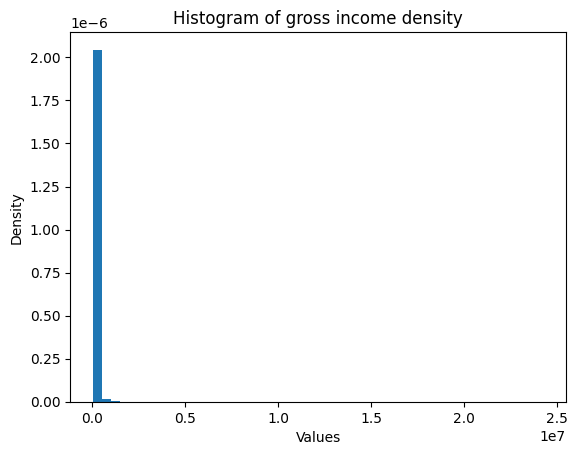

In [8]:
# Meteor dropped on north region of spain 
# Overall decreaseof 20% of economy immediately

# Histogram of gross income
plt.hist(df_train['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 

# Results is an exponential
np.random.seed(1000)

#### Perform transformation for training data

In [9]:
percentage_decrease = 0.2
new_income = manipulate_gross_income(df_train, percentage_decrease)
df_train['gross_income'] = new_income

In [10]:
percentage_population = 0.9
new_deceased_index = manipulate_deceased_index(df_train, percentage_population)
df_train['deceased_index_S'] = new_deceased_index

#### Training dataset after transformations 

In [11]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_train.columns.to_list()
df_train.head()

,loan,credit_card_debit_card,account,age,contract_length,new_customer_index,primary_customer_status,customer_type_start_month,gross_income,country_residence_ES,gender_H,gender_V,customer_relation_type_A,customer_relation_type_I,residence_index_S,foreigner_index_N,foreigner_index_S,join_channel_KAA,join_channel_KAB,join_channel_KAD,join_channel_KAE,join_channel_KAF,join_channel_KAG,join_channel_KAH,join_channel_KAI,join_channel_KAJ,join_channel_KAP,join_channel_KAQ,join_channel_KAR,join_channel_KAT,join_channel_KAZ,join_channel_KBG,join_channel_KCC,join_channel_KDH,join_channel_KEH,join_channel_KFA,join_channel_KFC,join_channel_KFD,join_channel_KFF,join_channel_KFG,join_channel_KFJ,join_channel_KFK,join_channel_KFL,join_channel_KFN,join_channel_KFP,join_channel_KFS,join_channel_KFU,join_channel_KGC,join_channel_KGV,join_channel_KGX,join_channel_KGY,join_channel_KHA,join_channel_KHC,join_channel_KHD,join_channel_KHE,join_channel_KHF,join_channel_KHK,join_channel_KHL,join_channel_KHM,join_channel_KHN,join_channel_RED,deceased_index_N,deceased_index_S,customer_segment_01 - TOP,customer_segment_02 - PARTICULARES,customer_segment_03 - UNIVERSITARIO,region_CENTRAL,region_EAST,region_NORTH,region_SOUTH,region_WEST,fixed_deposits
0,0,0,1,24,1226,0.0,1.0,1.0,79984.834091,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,24,1274,0.0,1.0,1.0,148623.831491,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,1,0,1,39,796,0.0,1.0,1.0,20141.031258,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
3,0,0,1,22,852,0.0,1.0,1.0,82614.558365,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,1,54,790,0.0,1.0,1.0,42008.278515,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1


In [12]:
# save manipulated dataset
df_train.to_csv(train_output_file, index=False)

#### **Overall change:**
- Decrease of 20% in gross income over the course of 2 years, equating to 0.833 % decrease per month on average.
- 90% of residents in the Northern region died. The 10% are those who were not in the region when the meteor struck.


Now, we will perform the same manipulations, but for test dataset.

### 5) Comparison between original and manipulated (Covid) dataset (for test data)

#### Test dataset before transformations 

In [13]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_test.columns.to_list()
df_test.head()

,age,contract_length,seniority_months,primary_customer_status,customer_type_start_month,gross_income,fixed_deposits,loan,credit_card_debit_card,account,country_residence_AL,country_residence_AR,country_residence_AT,country_residence_BE,country_residence_BR,country_residence_CH,country_residence_CL,country_residence_CN,country_residence_CO,country_residence_CR,country_residence_DE,country_residence_DO,country_residence_EC,country_residence_ES,country_residence_FI,country_residence_FR,country_residence_GB,country_residence_HN,country_residence_IN,country_residence_IT,country_residence_MX,country_residence_MZ,country_residence_NI,country_residence_NL,country_residence_PE,country_residence_PL,country_residence_PT,country_residence_SE,country_residence_TW,country_residence_US,country_residence_VE,gender_H,gender_V,customer_relation_type_A,customer_relation_type_I,residence_index_N,residence_index_S,foreigner_index_N,foreigner_index_S,join_channel_KAA,join_channel_KAB,join_channel_KAD,join_channel_KAE,join_channel_KAF,join_channel_KAG,join_channel_KAH,join_channel_KAI,join_channel_KAJ,join_channel_KAP,join_channel_KAQ,join_channel_KAR,join_channel_KAT,join_channel_KAZ,join_channel_KBG,join_channel_KCC,join_channel_KDH,join_channel_KEH,join_channel_KFA,join_channel_KFC,join_channel_KFD,join_channel_KFF,join_channel_KFG,join_channel_KFJ,join_channel_KFK,join_channel_KFL,join_channel_KFN,join_channel_KFP,join_channel_KFS,join_channel_KFU,join_channel_KGC,join_channel_KGV,join_channel_KGX,join_channel_KGY,join_channel_KHA,join_channel_KHC,join_channel_KHD,join_channel_KHE,join_channel_KHF,join_channel_KHK,join_channel_KHL,join_channel_KHM,join_channel_KHN,join_channel_RED,deceased_index_N,deceased_index_S,customer_segment_01 - TOP,customer_segment_02 - PARTICULARES,customer_segment_03 - UNIVERSITARIO,new_customer_index_0.0,new_customer_index_1.0,region_EAST,region_NORTH,region_SOUTH,region_WEST
0,53,1231.0,46,1.0,1.0,109856.04,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,28,832.0,33,1.0,1.0,161697.51,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
2,24,821.0,33,1.0,1.0,152566.32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,32,909.0,35,1.0,1.0,110952.21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0
4,33,772.0,31,1.0,1.0,73225.56,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


Distribution of gross income for test data

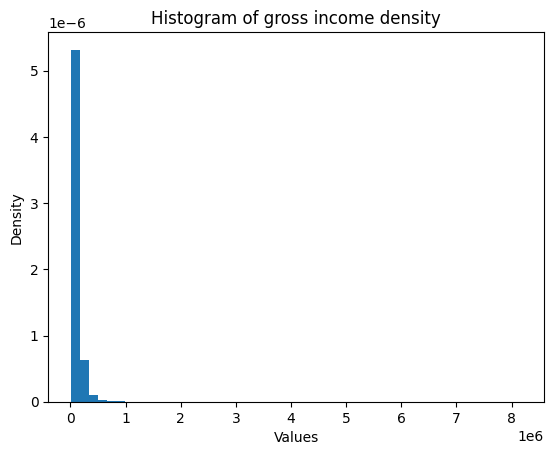

In [14]:
#meteor dropped on north region of spain 

#overall decreaseof 20% of economy immediately

#histogram of gross income
plt.hist(df_test['gross_income'], bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 
#results is an exponential
np.random.seed(1000)

#### Perform transformation for test data

In [15]:
new_income = manipulate_gross_income(df_test, percentage_decrease)
df_test['gross_income'] = new_income

In [16]:
new_deceased_index = manipulate_deceased_index(df_test, percentage_population)
df_test['deceased_index_S'] = new_deceased_index

#### Test dataset after transformations 

In [17]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_test.columns.to_list()
df_test.head()

,age,contract_length,seniority_months,primary_customer_status,customer_type_start_month,gross_income,fixed_deposits,loan,credit_card_debit_card,account,country_residence_AL,country_residence_AR,country_residence_AT,country_residence_BE,country_residence_BR,country_residence_CH,country_residence_CL,country_residence_CN,country_residence_CO,country_residence_CR,country_residence_DE,country_residence_DO,country_residence_EC,country_residence_ES,country_residence_FI,country_residence_FR,country_residence_GB,country_residence_HN,country_residence_IN,country_residence_IT,country_residence_MX,country_residence_MZ,country_residence_NI,country_residence_NL,country_residence_PE,country_residence_PL,country_residence_PT,country_residence_SE,country_residence_TW,country_residence_US,country_residence_VE,gender_H,gender_V,customer_relation_type_A,customer_relation_type_I,residence_index_N,residence_index_S,foreigner_index_N,foreigner_index_S,join_channel_KAA,join_channel_KAB,join_channel_KAD,join_channel_KAE,join_channel_KAF,join_channel_KAG,join_channel_KAH,join_channel_KAI,join_channel_KAJ,join_channel_KAP,join_channel_KAQ,join_channel_KAR,join_channel_KAT,join_channel_KAZ,join_channel_KBG,join_channel_KCC,join_channel_KDH,join_channel_KEH,join_channel_KFA,join_channel_KFC,join_channel_KFD,join_channel_KFF,join_channel_KFG,join_channel_KFJ,join_channel_KFK,join_channel_KFL,join_channel_KFN,join_channel_KFP,join_channel_KFS,join_channel_KFU,join_channel_KGC,join_channel_KGV,join_channel_KGX,join_channel_KGY,join_channel_KHA,join_channel_KHC,join_channel_KHD,join_channel_KHE,join_channel_KHF,join_channel_KHK,join_channel_KHL,join_channel_KHM,join_channel_KHN,join_channel_RED,deceased_index_N,deceased_index_S,customer_segment_01 - TOP,customer_segment_02 - PARTICULARES,customer_segment_03 - UNIVERSITARIO,new_customer_index_0.0,new_customer_index_1.0,region_EAST,region_NORTH,region_SOUTH,region_WEST
0,53,1231.0,46,1.0,1.0,85944.955547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,28,832.0,33,1.0,1.0,158941.861782,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0
2,24,821.0,33,1.0,1.0,84870.100579,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,32,909.0,35,1.0,1.0,96107.751864,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0
4,33,772.0,31,1.0,1.0,26775.241000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [18]:
# save manipulated dataset
df_test.to_csv(test_output_file, index=False)

#### **Overall change:**
- Decrease of 20% in gross income over the course of 2 years, equating to 0.833 % decrease per month on average.
- 90% of residents in the Northern region died. The 10% are those who were not in the region when the meteor struck.